# THE Best Neighborhood in Pittsburgh
### Final CS by Brian Grammer, Jeff Leonata, & Matt Gutkin
##### All data was downloaded as of 11/11/2019
---

## Introduction
##### We used a variety of datasets to try and come up with the best neighborhood for all of Pittsburgh
##### We looked through all of the available datasets and chose three that seemed to relate
##### Some of the other things we tried to explore, but ultimately nixed were Traffic Sings and Convenience stores
---

## Metric
##### We decided on using the current Crimes, Playgrounds, and School Enrollment numbers as our metric for best neighborhood

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [3]:
#importation of all csv files into pandas DataFrames
arrests = pd.read_csv("Crime.csv")
playgrounds = pd.read_csv("Playgrounds.csv")
school_enrollment = pd.read_csv("SchoolEnrollment.csv", index_col="Id")

In [4]:
school_enrollment2 = school_enrollment[['Neighborhood', 'Estimate; Total:']]
school_enrollment2.groupby('Estimate; Total:')
#school_enrollment2 = school_enrollment2.to_frame()
school_enrollment2 = school_enrollment2.reset_index()

school_enrollment2.head(10)

,Id,Neighborhood,Estimate; Total:
0,1,Allegheny Center,1389.0
1,2,Allegheny West,343.0
2,3,Allentown,2520.0
3,4,Arlington,1823.0
4,5,Arlington Heights,213.0
5,6,Banksville,3787.0
6,7,Bedford Dwellings,1251.0
7,8,Beechview,7770.0
8,9,Beltzhoover,1609.0
9,10,Bloomfield,8498.0


In [5]:
top10_SE = school_enrollment2.nlargest(10,['Estimate; Total:'])
top10_SE

,Id,Neighborhood,Estimate; Total:
77,78,Squirrel Hill South,15510.0
68,69,Shadyside,13290.0
13,14,Brookline,12777.0
76,77,Squirrel Hill North,11072.0
15,16,Carrick,9825.0
56,57,North Oakland,9565.0
53,54,Mount Washington,8525.0
9,10,Bloomfield,8498.0
7,8,Beechview,7770.0
36,37,Greenfield,7402.0


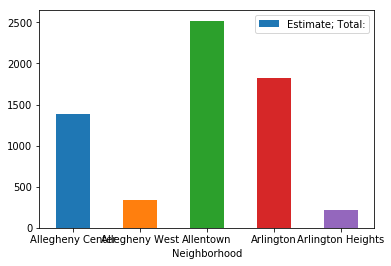

In [25]:
#Number of enrolled students per neighborhood
school_enrollment2.head(5).plot.bar(x='Neighborhood',y='Estimate; Total:', rot=0)

In [7]:
school_enrollment2.describe()

,Id,Estimate; Total:
count,91.00000,91.000000
mean,46.00000,3296.912088
std,26.41338,3145.352122
min,1.00000,3.000000
25%,23.50000,1124.000000
50%,46.00000,2291.000000
75%,68.50000,4312.000000
max,91.00000,15510.000000


**The neighborhood with the highest school enrollment:** Squirrel Hill South @ 15,510 Students

In [8]:
#Counting number of times each neighboorhood is mentioned in Crime.csv
#arrests_neighborhood = arrests.groupby('INCIDENTNEIGHBORHOOD').size().sort_values()

arrests_neighborhood = arrests.groupby('INCIDENTNEIGHBORHOOD').size()
arrests_neighborhood = arrests_neighborhood.to_frame()
arrests_neighborhood = arrests_neighborhood.reset_index()
arrests_neighborhood = arrests_neighborhood.rename(columns = {"INCIDENTNEIGHBORHOOD":"Neighborhood", 0:"Num_Crimes"})
arrests_neighborhood.head()

,Neighborhood,Num_Crimes
0,Allegheny Center,653
1,Allegheny West,75
2,Allentown,539
3,Arlington,168
4,Arlington Heights,100


In [9]:
#South Squirrel Hill is not in top 10 for crimes, it is in top 40 at 443 crimes
top10_C = arrests_neighborhood.nlargest(40,['Num_Crimes'])
top10_C

,Neighborhood,Num_Crimes
16,Central Business District,2136
78,South Side Flats,1954
15,Carrick,1316
26,East Allegheny,1236
43,Homewood South,1141
42,Homewood North,1036
29,East Liberty,999
51,Marshall-Shadeland,855
55,Mount Washington,839
10,Bluff,786


Squirrel Hill South is within the top fourty for the crime rate. Not too bad when considering the population. (11,363 people as of 2010).

**The neighborhood with the 83rd lowest arrests:** Squirrel Hill South @ 8,588,663 arrests

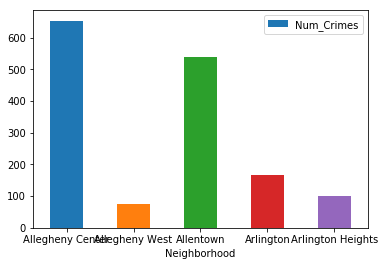

In [17]:
#Number of crimes per neighborhood
arrests_neighborhood.head(5).plot.bar(x='Neighborhood',y='Num_Crimes', rot=0)

In [18]:
arrests_neighborhood.describe()

,Num_Crimes
count,98.000000
mean,355.734694
std,385.483591
min,2.000000
25%,101.500000
50%,221.000000
75%,493.750000
max,2136.000000


**The neighborhood with the highest arrests recorded:** Central Business District @ 2,136 Crimes

Now we consider the neighborhood with the most playgrounds because, who doesn't like a good playground?

In [19]:
#Finds the neighborhood with the most playgrounds
#playgrounds_num = playgrounds.groupby('neighborhood').size().sort_values(ascending = False)

playgrounds_num = playgrounds_num = playgrounds.groupby('neighborhood').size()
playgrounds_num = playgrounds_num.to_frame()
playgrounds_num = playgrounds_num.reset_index()
playgrounds_num = playgrounds_num.rename(columns = {"neighborhood": "Neighborhood", 0:"Num_Playgrounds"})
playgrounds_num.head()

,Neighborhood,Num_Playgrounds
0,Allegheny Center,4
1,Allentown,1
2,Banksville,1
3,Bedford Dwellings,1
4,Beechview,5


In [20]:
top10_P = playgrounds_num.nlargest(10,['Num_Playgrounds'])
top10_P

,Neighborhood,Num_Playgrounds
55,Squirrel Hill South,8
4,Beechview,5
51,South Side Slopes,5
0,Allegheny Center,4
28,Highland Park,4
48,Sheraden,4
5,Beltzhoover,3
11,Carrick,3
16,Crawford-Roberts,3
20,Elliott,3


Squirrel Hill South completely destroys the competetition at a whopping 8 playgrounds.

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


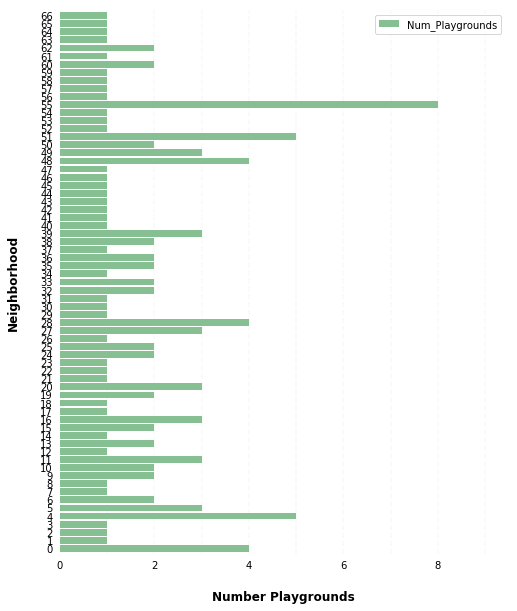

In [21]:
#Number of playgrounds per neighborhood

ax = playgrounds_num.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#efefef', zorder=1)

  # Set x-axis label
ax.set_xlabel("Number Playgrounds", labelpad=20, weight='bold', size=12)

  # Set y-axis label
ax.set_ylabel("Neighborhood", labelpad=20, weight='bold', size=12)
totals = []
total = sum(totals)
for i in ax.patches:
    totals.append(i.get_width())
#ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
#playgrounds_num.plot.barh(x='Neighborhood',y='Num_Playgrounds', rot = 0)

In [22]:
playgrounds_num.describe()

,Num_Playgrounds
count,67.00000
mean,1.80597
std,1.28203
min,1.00000
25%,1.00000
50%,1.00000
75%,2.00000
max,8.00000


**The neighborhood with the highest amount of playgrounds:** Squirrel Hill South @ 8 Playgrounds

In [23]:
#Playground to crime ratio
#Not all neighborhoods have playgrounds, so only the neighborhoods with playgrounds will be used.
ratio = 0
ratioDataframe =arrests_neighborhood

for i in range(0, len(arrests_neighborhood)):
    for j in range(0, len(playgrounds_num)):
        if playgrounds_num.loc[j, 'Neighborhood'] == arrests_neighborhood.loc[i, 'Neighborhood']:
            ratio = float(playgrounds_num.loc[j, 'Num_Playgrounds'])/float(arrests_neighborhood.loc[i, 'Num_Crimes'])
            ratioDataframe.loc[i, "Num_Crimes"] = ratio
ratioDataframe = ratioDataframe.sort_values("Num_Crimes").head(len(playgrounds_num))
ratioDataframe.head()

,Neighborhood,Num_Crimes
42,Homewood North,0.000965
78,South Side Flats,0.001024
10,Bluff,0.001272
68,Perry South,0.001570
52,Middle Hill,0.001757


In [24]:
#school enrollment to crime ratio
ratio = 0
ratioDataframe =arrests_neighborhood

for i in range(0, len(arrests_neighborhood)):
    for j in range(0, len(school_enrollment2)):
        if school_enrollment2.loc[j, 'Neighborhood'] == arrests_neighborhood.loc[i, 'Neighborhood']:
            ratio = float(school_enrollment2.loc[j, 'Estimate; Total:'])/float(arrests_neighborhood.loc[i, 'Num_Crimes'])
            ratioDataframe.loc[i, "Num_Crimes"] = ratio
ratioDataframe = ratioDataframe.sort_values("Num_Crimes").head(len(school_enrollment2))
ratioDataframe.nlargest(20,['Num_Crimes'])

,Neighborhood,Num_Crimes
51,Marshall-Shadeland,2.527380e+06
55,Mount Washington,2.384158e+06
9,Bloomfield,2.345448e+06
12,Brighton Heights,2.178108e+06
68,Perry South,2.068976e+06
20,Central Oakland,1.769888e+06
48,Lincoln-Lemington-Belmar,1.691619e+06
82,Squirrel Hill North,1.671872e+06
67,Perry North,1.465290e+06
2,Allentown,1.358280e+06


For the Playground:Crime ratio, Squirrel Hill South comes in at #17

## <center> Conclusion </center>
##### <center> Based on all factors, we decided that the best neighborhood is: </center>

 # **<center>| <u> SQUIRREL HILL SOUTH </u> | </center>**
---

<img src="Pic of Squirrel Hill South [GMaps].JPG">